In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("../experiments/loading_pool.csv")
df

,url,metric,policy,temp,seconds
0,http://360game.360.cn/,firstPaint,vanilla,cold,6.060058
1,http://360game.360.cn/,firstPaint,vanilla,hot,1.246466
2,http://360game.360.cn/,firstContentfulPaint,vanilla,cold,6.060058
3,http://360game.360.cn/,firstContentfulPaint,vanilla,hot,1.246466
4,http://360game.360.cn/,largestContentfulPaint,vanilla,cold,6.727110
...,...,...,...,...,...
382399,http://zhanzhang.so.com/sitetool/sitemap,loadEventEnd,block3p,hot,8.370133
382400,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,block3p,cold,2.532364
382401,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,block3p,hot,7.340639
382402,http://zhanzhang.so.com/sitetool/sitemap,largestContentfulPaint,block3p,cold,2.708952


In [4]:
ptdf = pd.pivot_table(data=df, values='seconds', index=['url', 'metric'], columns=['policy', 'temp'], aggfunc=np.median)
ptdf


policy                                                 block3p             \
temp                                                      cold        hot   
url                         metric                                          
http://360game.360.cn/      domContentLoadedEventEnd  5.284349   4.862117   
                            domInteractive            5.273639   4.853959   
                            firstContentfulPaint      1.369761   1.133789   
                            firstPaint                1.369761   1.133789   
                            largestContentfulPaint    2.342105   1.814900   
...                                                        ...        ...   
https://zoom.us/phonesystem domInteractive            6.771180  12.437135   
                            firstContentfulPaint      1.035763   8.871382   
                            firstPaint                1.035763   8.871382   
                            largestContentfulPaint    2.740012  10.218653   
                            loadEventEnd              7.133099  12.823468   

policy                                               page-length            \
temp                                                        cold       hot   
url                         metric                                           
http://360game.360.cn/      domContentLoadedEventEnd    6.003277  5.156156   
                            domInteractive              5.991968  5.148415   
                            firstContentfulPaint        1.412461  1.248559   
                            firstPaint                  1.412461  1.248559   
                            largestContentfulPaint      2.199266  2.271068   
...                                                          ...       ...   
https://zoom.us/phonesystem domInteractive              4.949190  6.795933   
                            firstContentfulPaint        1.116065  0.861854   
                            firstPaint                  1.116065  0.861854   
                            largestContentfulPaint      2.686052  2.293429   
                            loadEventEnd                4.956482  6.803383   

policy                                               split-key            \
temp                                                      cold       hot   
url                         metric                                         
http://360game.360.cn/      domContentLoadedEventEnd  6.437896  6.037139   
                            domInteractive            6.430095  6.026635   
                            firstContentfulPaint      1.447056  1.102648   
                            firstPaint                1.447056  1.102648   
                            largestContentfulPaint    2.672075  1.312248   
...                                                        ...       ...   
https://zoom.us/phonesystem domInteractive            6.303163  5.990007   
                            firstContentfulPaint      1.019840  0.830525   
                            firstPaint                1.019840  0.830525   
                            largestContentfulPaint    2.599833  2.393041   
                            loadEventEnd              6.729594  6.427136   

policy                                                 vanilla             
temp                                                      cold        hot  
url                         metric                                         
http://360game.360.cn/      domContentLoadedEventEnd  6.316454   6.239783  
                            domInteractive            6.305750   6.232211  
                            firstContentfulPaint      1.436505   1.135984  
                            firstPaint                1.436505   1.135984  
                            largestContentfulPaint    1.972105   1.417257  
...                                                        ...        ...  
https://zoom.us/phonesystem domInteractive            4.298083  14.021671  
   

<AxesSubplot:ylabel='Frequency'>

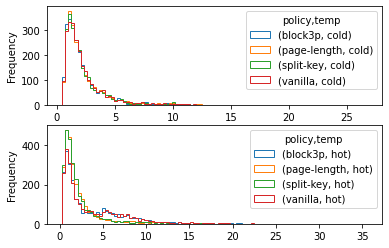

In [5]:
fig, ax = plt.subplots(2, 1)
ptdf.loc[(slice(None), "largestContentfulPaint"), (slice(None), "cold")].plot.hist(bins=100, histtype='step', ax=ax[0])
ptdf.loc[(slice(None), "largestContentfulPaint"), (slice(None), "hot")].plot.hist(bins=100, histtype='step', ax=ax[1])

(-10.0, 10.0)

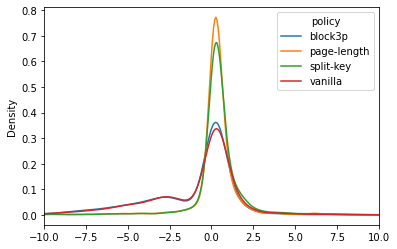

In [29]:
colds = ptdf.loc[(slice(None), "loadEventEnd"), (slice(None), "cold")]
hots = ptdf.loc[(slice(None), "loadEventEnd"), (slice(None), "hot")]
colds.columns = colds.columns.droplevel(level=1)
hots.columns = hots.columns.droplevel(level=1)
loadEventDeltas = (colds - hots)
ax = loadEventDeltas.plot.density()
ax.set_xlim((-10, 10))

In [25]:
loadEventDeltas.sort_values("vanilla").iloc[:25]

,policy,block3p,page-length,split-key,vanilla
url,metric,,,,
https://www.marriott.com/default.mi,firstPaint,-1.863960,-1.526192,-0.957774,-21.997901
https://www.imdb.com/tv/?ref_=nv_vid_tv,firstPaint,-20.339886,0.145070,0.483774,-21.394211
https://aws.amazon.com/shield/?hp=tile&so-exp=below,firstPaint,-7.525970,0.162706,-12.683009,-21.324379
https://www.uol.com.br/,firstPaint,-15.540111,0.091754,-4.824897,-19.768832
https://graphics.reuters.com/USA-POLLING-TRUMP/0100422Q4HZ/index.html,firstPaint,-17.976004,0.238669,0.208859,-17.980438
https://www.homedepot.com/b/Paint/Glidden-Essentials/N-5yc1vZar2dZftx,firstPaint,-15.511554,-0.134063,0.433078,-17.509296
https://www.dailymotion.com/,firstPaint,-6.897679,0.311870,0.519114,-17.330110
https://www.reddit.com/,firstPaint,-16.451612,0.639676,0.927010,-15.339998
https://www.amazon.com/Razer-Seiren-Streaming-Microphone-Built/dp/B075HCLMYP?pd_rd_w=WZ6i9&pf_rd_p=1238aa10-db6d-4ecd-83a2-8e2b6d9f1e24&pf_rd_r=6B6QJYQ168W4DXGN2R6P&pd_rd_r=91ffa38a-dbe5-4573-9114-0acae7e80f61&pd_rd_wg=BwHuj,firstPaint,-15.207836,-15.527865,-9.042958,-15.140453


In [13]:
xadf = df[df.url == "https://www.youtube.com/"]
xadf

,url,metric,policy,temp,seconds
91236,https://www.youtube.com/,domInteractive,vanilla,cold,11.641037
91237,https://www.youtube.com/,domInteractive,vanilla,hot,25.901520
91238,https://www.youtube.com/,domContentLoadedEventEnd,vanilla,cold,11.691073
91239,https://www.youtube.com/,domContentLoadedEventEnd,vanilla,hot,25.936135
91240,https://www.youtube.com/,firstPaint,vanilla,cold,0.827240
...,...,...,...,...,...
378051,https://www.youtube.com/,firstContentfulPaint,block3p,hot,14.149349
378052,https://www.youtube.com/,loadEventEnd,block3p,cold,11.531047
378053,https://www.youtube.com/,loadEventEnd,block3p,hot,25.321398
378054,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.355550


In [23]:
xadf[xadf.metric == "largestContentfulPaint"].sort_values('seconds')

,url,metric,policy,temp,seconds
91270,https://www.youtube.com/,largestContentfulPaint,vanilla,cold,6.231610
91258,https://www.youtube.com/,largestContentfulPaint,vanilla,cold,6.269418
186927,https://www.youtube.com/,largestContentfulPaint,page-length,hot,6.414694
186914,https://www.youtube.com/,largestContentfulPaint,page-length,cold,6.590783
186903,https://www.youtube.com/,largestContentfulPaint,page-length,hot,6.599970
282409,https://www.youtube.com/,largestContentfulPaint,split-key,hot,6.652822
282421,https://www.youtube.com/,largestContentfulPaint,split-key,hot,11.301865
378054,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.355550
186926,https://www.youtube.com/,largestContentfulPaint,page-length,cold,11.463313
378030,https://www.youtube.com/,largestContentfulPaint,block3p,cold,11.473765
